# Decision Tree

En el pair programming de hoy debéis usar el csv que guardastéis cuando hicistéis el pairprgramming de codificicación (este csv debería tener las variables estadandarizas).

- Ajustar el modelo a un Decision Tree

- Extraer las métricas

- Debatid entre vosotras que modelo es mejor y por qué (basándose en las métricas)

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('once')

import sys
sys.path.append("../../")
from src import funciones as fun
from src import variables as var

## 1º: Decision Tree Label

In [2]:
df_label = pd.read_pickle('../archivos/country_label.pkl')
df_label.sample()

,country,basic_boxcox,basic,mcdonalds,cappuccino,milk,rice,eggs,chicken,beef,...,taxi,gasoline,internet,gym_monthly,cinema,preschool,primary_school,apt_3beds_outcentre,monthly_salary,country_label
2457,Ukraine,9.96011,59.83,-1.156695,-0.805556,-1.0625,-0.462428,-0.746377,-0.534545,-0.955224,...,-0.895005,-0.754098,-0.803394,-0.779811,-0.695589,-0.419092,-0.189771,-0.464543,-0.494903,196


In [3]:
Xl = df_label.drop(['basic_boxcox', 'country', 'basic'], axis = 1)
yl = df_label["basic"]

In [4]:
xl_train, xl_test, yl_train, yl_test = train_test_split(Xl, yl, test_size = 0.3, random_state = 42)

In [5]:
arbol = DecisionTreeRegressor(random_state = 0) 

In [6]:
arbol.fit(xl_train, yl_train) 

DecisionTreeRegressor(random_state=0)

In [7]:
# fig = plt.figure(figsize = (10,6))
# tree.plot_tree(arbol, feature_names = xl_train.columns, filled = True)
# plt.show() 

In [8]:
max_features = np.sqrt(len(xl_train.columns))
max_features

4.795831523312719

In [9]:
print(arbol.tree_.max_depth)

33


In [10]:
yl_pred_test_dt = arbol.predict(xl_test)
yl_pred_train_dt = arbol.predict(xl_train)

In [12]:
dt_resultsl = fun.metricas(yl_test, yl_train, yl_pred_test_dt, yl_pred_train_dt, "Decission Tree Label")
dt_resultsl

,MAE,MSE,RMSE,R2,set,modelo
0,5.091228e+01,6.436314e+03,8.022664e+01,0.034782,test,Decission Tree Label
1,6.476005e-17,1.126151e-30,1.061203e-15,1.000000,train,Decission Tree Label


En este modelo tenemos un claro overfitting.

## Probamos con el encondig GET DUMMIES

In [13]:
df_dummie = pd.read_pickle('../archivos/country_dummie.pkl')
df_dummie.sample()

,basic_boxcox,basic,mcdonalds,cappuccino,milk,rice,eggs,chicken,beef,banana,...,country_United Kingdom,country_United States,country_Uruguay,country_Uzbekistan,country_Vanuatu,country_Venezuela,country_Vietnam,country_Yemen,country_Zambia,country_Zimbabwe
4015,14.632609,136.0,0.991453,-0.180556,0.479167,-0.254335,-0.231884,-0.012727,-0.038875,1.380783,...,0,0,0,0,0,0,0,0,0,0


In [14]:
Xd = df_dummie.drop(['basic_boxcox', 'basic'], axis = 1)
yd = df_dummie["basic"]

In [15]:
xd_train, xd_test, yd_train, yd_test = train_test_split(Xd, yd, test_size = 0.2, random_state = 42)

In [16]:
arbold = DecisionTreeRegressor(random_state = 0) 

In [17]:
arbold.fit(xd_train, yd_train) 

DecisionTreeRegressor(random_state=0)

In [18]:
max_features = np.sqrt(len(xd_train.columns))
max_features

15.165750888103101

In [19]:
print(arbold.tree_.max_depth)

38


In [20]:
yd_pred_test_dt = arbold.predict(xd_test)
yd_pred_train_dt = arbold.predict(xd_train)

In [22]:
dt_resultsd = fun.metricas(yd_test, yd_train, yd_pred_test_dt, yd_pred_train_dt, "Decission Tree Dummie 1")
dt_resultsd

,MAE,MSE,RMSE,R2,set,modelo
0,4.947905e+01,5.654155e+03,7.519411e+01,0.15468,test,Decission Tree Dummie 1
1,1.988088e-17,2.825243e-31,5.315302e-16,1.00000,train,Decission Tree Dummie 1


In [23]:
# definimos un diccionario con los hiperparámetros

paramd1 = {"max_depth": [13,15,17,19],
        "max_features": [1,2,3,4],
        "min_samples_split": [10, 50, 100],
        "min_samples_leaf": [10,50,100]} 

In [25]:
gsd = GridSearchCV(
            estimator=DecisionTreeRegressor(), 
            param_grid= paramd1, 
            cv=10, 
            verbose=-1,
            return_train_score = True, 
            scoring="neg_mean_squared_error")

In [26]:
gsd.fit(xd_train, yd_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [13, 15, 17, 19],
                         'max_features': [1, 2, 3, 4],
                         'min_samples_leaf': [10, 50, 100],
                         'min_samples_split': [10, 50, 100]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=-1)

In [27]:
modelo_dummie = gsd.best_estimator_
modelo_dummie

DecisionTreeRegressor(max_depth=17, max_features=4, min_samples_leaf=10,
                      min_samples_split=50)

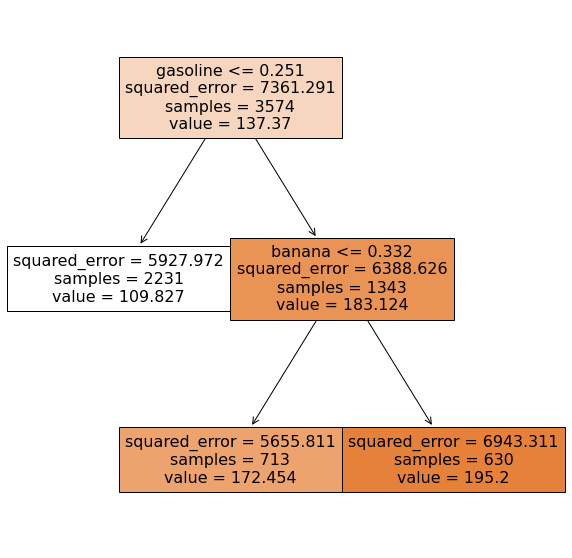

In [28]:
fig = plt.figure(figsize=(10, 10))
tree.plot_tree(modelo_dummie, feature_names=xd_train.columns, filled=True);

In [29]:
yd_pred_test_dt2 = modelo_dummie.predict(xd_test)
yd_pred_train_dt2 = modelo_dummie.predict(xd_train)

In [30]:
dt_results2d = fun.metricas(yd_test, yd_train, yd_pred_test_dt2, yd_pred_train_dt2, "Decission Tree 2 Dummie")
dt_results2d

,MAE,MSE,RMSE,R2,set,modelo
0,58.039482,5461.670767,73.903117,0.183458,test,Decission Tree 2 Dummie
1,59.501461,6052.653994,77.798805,0.177773,train,Decission Tree 2 Dummie


## Probamos con el encondig al que le dimos un orden manualmente

In [31]:
df_orden = pd.read_pickle('../archivos/country_pesos.pkl')
df_orden.head()

,basic_boxcox,basic,mcdonalds,cappuccino,milk,rice,eggs,chicken,beef,banana,...,taxi,gasoline,internet,gym_monthly,cinema,preschool,primary_school,apt_3beds_outcentre,monthly_salary,country_pesos
0,16.684542,182.13,-0.219373,0.601852,2.395833,1.046243,1.304348,0.747273,4.294342,3.245552,...,-0.258103,0.245902,-0.302919,1.074934,0.208531,0.101671,1.262442,0.904358,0.517125,3
1,10.443987,66.00,-0.350427,0.625000,3.520833,-0.289017,-0.014493,-0.292727,0.338771,0.241993,...,-0.691550,-0.131148,-0.439942,1.455932,0.053956,1.617468,2.248014,0.750069,-0.004580,1
2,9.945543,59.65,-0.552707,0.421296,1.791667,-0.398844,-0.384058,-0.490909,0.148560,0.014235,...,-0.744625,-0.147541,-0.450326,-0.011987,0.053956,0.335639,2.036034,-0.045124,-0.090119,1
3,8.515986,43.57,-0.923077,-0.069444,-0.625000,-0.514451,-0.934783,-0.505455,-0.656716,-1.081851,...,-0.797701,0.114754,-0.635978,-0.452562,-0.564346,-0.358551,-0.390842,-0.034428,-0.324674,0
4,9.816500,58.07,-0.746439,-0.398148,-0.666667,-0.502890,-0.884058,-0.483636,-0.690038,-0.967972,...,-0.877313,-0.065574,-0.670930,-0.661335,-0.475392,-0.409781,-0.590637,-0.371835,-0.347005,0


In [32]:
Xo = df_orden.drop(['basic_boxcox', 'basic'], axis = 1)
yo = df_orden["basic"]

In [33]:
xo_train, xo_test, yo_train, yo_test = train_test_split(Xo, yo, test_size = 0.3, random_state = 42)

In [34]:
arbolo = DecisionTreeRegressor(random_state = 0) 

In [35]:
arbolo.fit(xo_train, yo_train) 

DecisionTreeRegressor(random_state=0)

In [36]:
max_features = np.sqrt(len(xo_train.columns))
max_features

4.795831523312719

In [37]:
print(arbolo.tree_.max_depth)

34


In [38]:
yo_pred_test_dt = arbolo.predict(xo_test)
yo_pred_train_dt = arbolo.predict(xo_train)

In [39]:
dt_resultso = fun.metricas(yo_test, yo_train, yo_pred_test_dt, yo_pred_train_dt, "Decission Tree Orden 1")
dt_resultso

,MAE,MSE,RMSE,R2,set,modelo
0,4.799936e+01,6.235455e+03,7.896489e+01,0.064904,test,Decission Tree Orden 1
1,2.726739e-17,3.874929e-31,6.224893e-16,1.000000,train,Decission Tree Orden 1


Unimos las métricas de todos nuestros modelos:

In [43]:
metricas_decision_tree = pd.concat([dt_resultsl, dt_resultsd, dt_results2d, dt_resultso], axis = 0)

In [45]:
metricas_decision_tree

,MAE,MSE,RMSE,R2,set,modelo
0,5.091228e+01,6.436314e+03,8.022664e+01,0.034782,test,Decission Tree Label
1,6.476005e-17,1.126151e-30,1.061203e-15,1.000000,train,Decission Tree Label
0,4.947905e+01,5.654155e+03,7.519411e+01,0.154680,test,Decission Tree Dummie 1
1,1.988088e-17,2.825243e-31,5.315302e-16,1.000000,train,Decission Tree Dummie 1
0,5.803948e+01,5.461671e+03,7.390312e+01,0.183458,test,Decission Tree 2 Dummie
1,5.950146e+01,6.052654e+03,7.779880e+01,0.177773,train,Decission Tree 2 Dummie
0,4.799936e+01,6.235455e+03,7.896489e+01,0.064904,test,Decission Tree Orden 1
1,2.726739e-17,3.874929e-31,6.224893e-16,1.000000,train,Decission Tree Orden 1


In [47]:
metricas_decision_tree.to_csv('../archivos/metricas_decision_tree.csv')